# The report for the task provided by Apobank

## Task Description

You assume the role of a data analyst at MedBank. A cooperative bank specializing in the healthcare market.

You have just received your new project and the associated dataset unknown to you.

Their task is to create the best possible forecasting model for a marketing campaign for a new product "MedTrust" and to predict the completion probabilities.

Analyze the training data set for this purpose.

First carry out an exploratory analysis : For which of the explanatory variables are correlations to the target variable observed? Which ones are technically meaningful?

Make a selection of explanatory variables and then create various predictive models (logistic regression, decision trees, and random forests).

Create different models with different parameters for each procedure . Proceed as systematically as possible so that you can later describe the performance of the model (= AUC) as a function of the parameters.

Apply this model to forecast the test data.

## Dataset Description

### Data Source

The dataset is the result of a MedBank call center marketing campaign for the MedTrust product.

The data is purely fictitious "dummy data set" , which has nothing to do with apoBank's real customers.

The data are largely cleansed.

You can use all the variables for your modeling, but you do not have to. It is up to you to change or combine variables.

Please document all decisions and changes.

### Files

The file TrainData receives the training data set for the challenge.

The file TestData receives the test data for the challenge. In this file, the Variable target variable is not filled.

The solution template file is the default pattern for submitting the solution (see Submission Format)

### Variables

Master number: Internal customer identification number in the bank system

Target Variable: Customer completed the product in the campaign

Day: Call day of the call center agent

Month: month of call of the call center agent

Duration: duration of the call

Call ID: Internal call identification number

Age: age of the customer

Gender: Customer's gender

Type of employment: type of employment of the customer

Marital status: Marital status of the customer

Credit Failure: Customer has a defaulted loan in the bank

Account balance: Current account balance of the customer in his checking account

House: Customer has property

Credit: Customer has a loan in the bank

Contact type: In this way the customer was contacted

Number of speeches: The number of times the customer was addressed has already been addressed in this campaign

Days since last campaign: so many days ago, the customer was addressed in the campaign

Number of contacts last campaign: The number of times the customer was approached during the last campaign

Result last campaign: result of last campaign

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset

In [2]:
df = pd.read_csv('E:\\Personal\\tasks\\Medtrust\\TrainData.csv',
                 encoding = "ISO-8859-1")

### renaming column names

In [3]:
m = {'ja' : 1, 'nein' : 0}
df['Zielvariable'] = df['Zielvariable'].str.lower().map(m)

In [4]:
def processing(df):
    # rename columns
    df.columns = [c.lower().replace(' ', '_') for 
                  c in df.columns]
    
    ## Drop columns that might not be useful
    df = df.drop(['tage_seit_letzter_kampagne',
                  'anruf-id','kontostand','geschlecht',
                  'anzahl_kontakte_letzte_kampagne'], 
                 axis=1)
    
    # normalizing categorical variables
    df = pd.get_dummies(df)
    return df

In [5]:
df = processing(df)

In [6]:
df.head()

,stammnummer,zielvariable,tag,dauer,alter,anzahl_der_ansprachen,monat_apr,monat_aug,monat_dec,monat_feb,...,haus_nein,kredit_ja,kredit_nein,kontaktart_Festnetz,kontaktart_Handy,kontaktart_Unbekannt,ergebnis_letzte_kampagne_Erfolg,ergebnis_letzte_kampagne_Kein Erfolg,ergebnis_letzte_kampagne_Sonstiges,ergebnis_letzte_kampagne_Unbekannt
0,432148809,0,27,166,30,2,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,432184318,0,26,183,42,2,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
2,432182482,0,5,227,26,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,432150520,0,2,31,34,3,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,432145870,0,15,1231,48,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [7]:
df.shape

(31480, 50)

## remove outliers

In [122]:
from scipy import stats
import numpy as np

def remove_outlier(X):
    z = np.abs(stats.zscore(X))
    print(z)
    threshold = 3
    print(np.where(z > 3))
    X = X[(z < 3).all(axis=1)]
    print(X.shape)
    return X

In [123]:
df_new = remove_outlier(df)

[[1.23775544 0.36495115 1.34576768 ... 0.34814136 0.20704481 0.47192606]
 [1.48385654 0.36495115 1.22562041 ... 0.34814136 0.20704481 0.47192606]
 [1.34313504 0.36495115 1.29747214 ... 0.34814136 0.20704481 0.47192606]
 ...
 [0.15328728 0.36495115 0.14429503 ... 2.87239642 0.20704481 2.118976  ]
 [0.10377416 0.36495115 1.5860622  ... 0.34814136 0.20704481 0.47192606]
 [0.51743097 0.36495115 1.65791393 ... 0.34814136 4.82987227 2.118976  ]]
(array([    1,     2,     2, ..., 31478, 31479, 31479], dtype=int64), array([16, 20, 43, ...,  5,  9, 48], dtype=int64))
(13294, 50)


## Feature Selection using Principal component analysis

## Split the dataframe into features and target variable for model building

In [8]:
X=df.drop('zielvariable',axis=1)
y=df['zielvariable']

In [9]:
X.head()

,stammnummer,tag,dauer,alter,anzahl_der_ansprachen,monat_apr,monat_aug,monat_dec,monat_feb,monat_jan,...,haus_nein,kredit_ja,kredit_nein,kontaktart_Festnetz,kontaktart_Handy,kontaktart_Unbekannt,ergebnis_letzte_kampagne_Erfolg,ergebnis_letzte_kampagne_Kein Erfolg,ergebnis_letzte_kampagne_Sonstiges,ergebnis_letzte_kampagne_Unbekannt
0,432148809,27,166,30,2,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,432184318,26,183,42,2,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
2,432182482,5,227,26,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,432150520,2,31,34,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,432145870,15,1231,48,2,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: zielvariable, dtype: int64

In [12]:
y.value_counts()

0    27780
1     3700
Name: zielvariable, dtype: int64

#### We can see that y has imbalanced class distribution. Hence we perform over sampling using SMOTE from imblearn package 

#### We plot the 2d representation of the dataframe

In [13]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

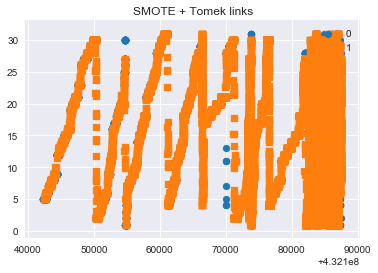

In [14]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [128]:
X_smt.shape

(54070, 49)

#### Now we know that all the fetures do not contribute towards the learning of the model. Some features have higher importance than other features. Hence in order to increase the accuracy of the model, we select on those features that are important. For this, we perform Principal Component analysis on the feature set.

In [15]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
def feature_plot(X, n):
    #Scaling the values
    X = scale(X)
    pca = PCA(n_components=n)
    pca.fit(X)

    #The amount of variance that each PC explains
    var= pca.explained_variance_ratio_

    #Cumulative Variance explains
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print(var1)
    p = plt.plot(var1)
    return p

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[ 8.73 14.28 19.3  23.99 28.2  32.08 35.49 38.67 41.67 44.48 47.05 49.55
 52.01 54.44 56.76 59.04 61.3  63.55 65.79 67.94 70.06 72.16 74.24 76.29
 78.33 80.33 82.3  84.22 86.07 87.86 89.6  91.26 92.88 94.43 95.93 97.14
 98.14 99.04 99.74 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99
 99.99]


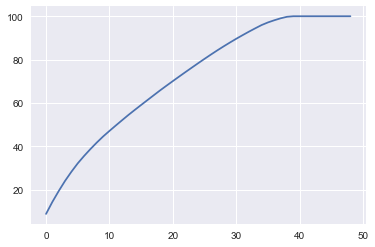

In [16]:
f = feature_plot(X_smt,49)

#### We can see from above plot that there are only 39 features important as the graph becomes constant after a certain point. Hence we select on 39 features from the feature set using the PCA analysis.

In [17]:
def feature_reduction(X,n):
    pca = PCA(n_components=n)
    pca.fit(X)
    X=pca.fit_transform(X)
    return X

In [18]:
X_new = feature_reduction(X_smt,39)

**Split the dataset into train set and test set  in the ratio of 
67% and 33% respectively using train_test_split from sklearn package.**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,
                                                 y_smt,test_size=0.33)

** Now, we have our target variable as binary categorical 
variable containing of two classes 0 and 1. Hence, this 
is a classification task. We start by using logistic 
regression and then move on to Decision tree and 
Randomforest classifier. The results and auc curves 
are presented along with them below.**

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, random_state=5).fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
model.score(X_test,y_test)

0.8416680698209575

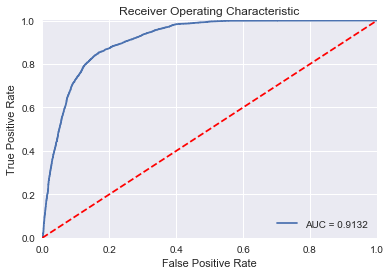

In [38]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_pred = y_pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc=auc(fpr, tpr)
roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#### The Logistic Regression model learns with the accuracy of 71%. The above plot is Roc-auc-curve which shows an auc score of 81%

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced').fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
model.score(X_test,y_test)

0.9179435370713364

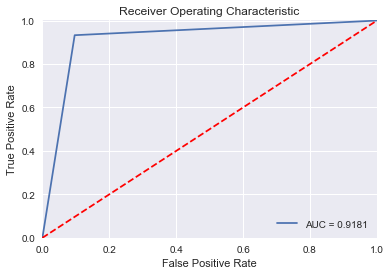

In [40]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_pred = y_pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc=auc(fpr, tpr)
roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,y_train)

y_pred = model.predict_proba(X_test)

model.score(X_test,y_test)

0.9409552674412078

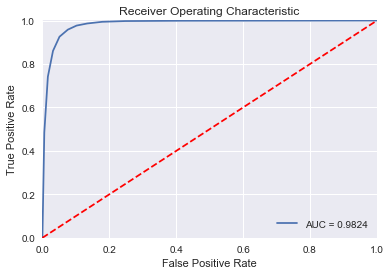

In [42]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_pred = y_pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc=auc(fpr, tpr)
roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#### Below is the pipeline where we do Gridsearchcv in order to find best parameters for RandomForest Classifier.

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

pipe = Pipeline([('select', PCA(n_components=39)),
                 ('model', RandomForestClassifier(max_depth=5, max_features=39))])

from sklearn.model_selection import GridSearchCV

param_grid = {'select__n_components':np.arange(1, X_smt.shape[1] + 1),
              'model__max_depth':[10,20,30],
              'model__max_features':['auto','sqrt']
             }
gcv = GridSearchCV(pipe, param_grid, return_train_score=True)
gcv.fit(X_train, y_train)


pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_model__max_depth,param_model__max_features,param_select__n_components,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
232,3.526761,0.053360,0.934837,0.996517,30,auto,37,"{'model__max_depth': 30, 'model__max_features'...",1,0.933488,0.996060,0.934893,0.996641,0.936131,0.996848,0.213502,9.618332e-03,0.001080,0.000334
237,3.201372,0.056963,0.934423,0.996890,30,auto,42,"{'model__max_depth': 30, 'model__max_features'...",2,0.933156,0.996765,0.935058,0.997014,0.935053,0.996890,0.024552,2.160827e-03,0.000895,0.000102
273,3.429255,0.053631,0.934091,0.996613,30,sqrt,29,"{'model__max_depth': 30, 'model__max_features'...",3,0.935230,0.997470,0.934727,0.996226,0.932316,0.996143,0.233390,4.491674e-03,0.001272,0.000607
227,3.533377,0.057964,0.934036,0.996738,30,auto,32,"{'model__max_depth': 30, 'model__max_features'...",4,0.933156,0.996516,0.933731,0.996517,0.935219,0.997180,0.232458,2.159980e-03,0.000869,0.000313
128,3.554556,0.056897,0.933980,0.990379,20,auto,31,"{'model__max_depth': 20, 'model__max_features'...",5,0.935479,0.989632,0.931243,0.990918,0.935219,0.990587,0.564699,6.893477e-03,0.001938,0.000545
218,2.560922,0.044242,0.933953,0.996129,30,auto,23,"{'model__max_depth': 30, 'model__max_features'...",6,0.934152,0.995853,0.934478,0.996351,0.933228,0.996185,0.080536,7.370654e-03,0.000529,0.000207
229,3.010077,0.052239,0.933953,0.996682,30,auto,34,"{'model__max_depth': 30, 'model__max_features'...",6,0.935810,0.996724,0.930580,0.996392,0.935468,0.996931,0.126566,7.584297e-03,0.002389,0.000222
275,3.430677,0.057933,0.933953,0.996088,30,sqrt,31,"{'model__max_depth': 30, 'model__max_features'...",6,0.934317,0.996102,0.932073,0.996434,0.935468,0.995729,0.241391,8.325269e-03,0.001410,0.000288
134,3.078933,0.037163,0.933814,0.990006,20,auto,37,"{'model__max_depth': 20, 'model__max_features'...",9,0.933571,0.988927,0.932819,0.991623,0.935053,0.989467,0.023952,6.922751e-03,0.000928,0.001165
271,3.308193,0.054044,0.933814,0.996931,30,sqrt,27,"{'model__max_depth': 30, 'model__max_features'...",9,0.934898,0.996765,0.930746,0.997263,0.935800,0.996765,0.332454,2.774566e-03,0.002201,0.000235


**Hence we know that the model performs best for 37 features which means that still there are 2 features which are not contributing much towards the model building.**

**We can also find the best parameters for Random 
Forest Classifier. Hence we run again the Random 
Forest classifier again using the best parameters.**

## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=15,class_weight='balanced',
                               min_samples_split=2,n_estimators=100,n_jobs=-1,
                               random_state=50, max_features=37,
                               criterion='entropy',max_leaf_nodes=5, 
                               min_samples_leaf=2).fit(X_train,y_train)

y_pred = model.predict_proba(X_test)

model.score(X_test,y_test)

0.842173205365662

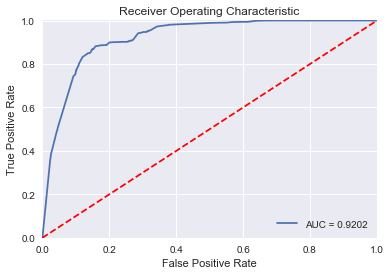

In [81]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_pred = y_pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc=auc(fpr, tpr)
roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Hence we can see that there is correction in the auc. **

**Now, we Read and perform processing and feature selection for the test set for which we need to predict the probability of the target variable.**

In [85]:
df_test = pd.read_csv('E:\\Personal\\tasks\\Medtrust\\TestData.csv',
                      encoding = "ISO-8859-1")

In [86]:
df_test

,Stammnummer,Zielvariable,Tag,Monat,Dauer,Anruf-ID,Alter,Geschlecht,Art der Anstellung,Familienstand,Schulabschluß,Ausfall Kredit,Kontostand,Haus,Kredit,Kontaktart,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne,Ergebnis letzte Kampagne
0,432176974,NaN,5,may,283,69546777,35,m,Management,verheiratet,Studium,nein,76,nein,nein,Handy,1,362.0,9,Kein Erfolg
1,432157692,NaN,18,jul,111,69546887,31,m,Management,verheiratet,Studium,nein,557,ja,nein,Handy,1,NaN,0,Unbekannt
2,432170850,NaN,29,jan,475,69550874,26,m,Technischer Beruf,single,Studium,nein,1274,nein,nein,Festnetz,2,NaN,0,Unbekannt
3,432151613,NaN,5,jun,209,69560082,26,m,Arbeiter,verheiratet,Abitur,nein,986,ja,nein,Unbekannt,3,NaN,0,Unbekannt
4,432167744,NaN,18,nov,459,69561716,32,m,Arbeiter,single,Abitur,nein,3845,ja,nein,Handy,3,NaN,0,Unbekannt
5,432171512,NaN,2,feb,491,69562101,34,m,Management,verheiratet,Studium,nein,490,ja,nein,Handy,1,NaN,0,Unbekannt
6,432164841,NaN,22,aug,187,69562274,30,w,Management,verheiratet,Studium,nein,696,nein,nein,Handy,4,NaN,0,Unbekannt
7,432143118,NaN,7,may,117,69566275,50,m,Arbeiter,verheiratet,Real-/Hauptschule,nein,156,ja,nein,Unbekannt,3,NaN,0,Unbekannt
8,432162895,NaN,12,aug,157,69567224,57,w,Arbeiter,verheiratet,Abitur,nein,6004,ja,nein,Handy,6,NaN,0,Unbekannt
9,432160756,NaN,31,jul,226,69568206,38,m,Arbeiter,verheiratet,Abitur,nein,4336,ja,nein,Handy,6,NaN,0,Unbekannt


In [87]:
df_test = processing(df_test)

In [88]:
df_test.head()

,stammnummer,zielvariable,tag,dauer,alter,anzahl_der_ansprachen,monat_apr,monat_aug,monat_dec,monat_feb,...,haus_nein,kredit_ja,kredit_nein,kontaktart_Festnetz,kontaktart_Handy,kontaktart_Unbekannt,ergebnis_letzte_kampagne_Erfolg,ergebnis_letzte_kampagne_Kein Erfolg,ergebnis_letzte_kampagne_Sonstiges,ergebnis_letzte_kampagne_Unbekannt
0,432176974,NaN,5,283,35,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,432157692,NaN,18,111,31,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,432170850,NaN,29,475,26,2,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
3,432151613,NaN,5,209,26,3,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,432167744,NaN,18,459,32,3,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [89]:
df_test.shape

(13731, 50)

**Hence we can see that we have to predict for all 13731 ids present in the test set.**

In [90]:
X_predict = df_test.drop('zielvariable',axis=1)

#### Now we know that all the fetures do not contribute towards the learning of the model. Some features have higher importance than other features. Hence in order to increase the accuracy of the model, we select on those features that are important. For this, we perform Principal Component analysis on the feature set.

In [93]:
X_predict = feature_reduction(X_predict,39)

In [94]:
y_predict = model.predict_proba(X_predict)

In [96]:
y_predict[:,1]

array([0.2553175 , 0.26703792, 0.82720134, ..., 0.42155282, 0.8724489 ,
       0.30558999])

**Hence we have the predicted list for all 13731 ids. Now lets put them in the dataframe and print the forecast output as the csv file for uploading on the kaggle**

In [97]:
results = pd.DataFrame({'ID': df_test.loc[:,'stammnummer'], 
                        'expected': y_predict[:,1]})
results.head()

,ID,expected
0,432176974,0.255318
1,432157692,0.267038
2,432170850,0.827201
3,432151613,0.872449
4,432167744,0.827201


In [98]:
results.to_csv('E:\\Personal\\tasks\\Medtrust\\results.csv', 
               index = False, columns=['ID','expected'])